# Superstore Dataset

## Import Libraries

In [103]:
# import necessary libraries
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# checking for the encoding
import chardet

data_path = 'D:\Project\superstore.csv'
with open(data_path, 'rb') as f:
    result = chardet.detect(f.read())
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


In [4]:
# load the data
df = pd.read_csv(data_path, encoding=result['encoding'])
# print(df)

In [5]:
df.columns.unique()

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [6]:
# Check unique values for selected columns
for feature in ['Segment', 'Country', 'State', 'Region', 'Category', 'Sub-Category', 'Ship Mode']:
    feature_unique = df[feature].unique()
    print(feature, len(feature_unique), 'unique values are:', feature_unique)

Segment 3 unique values are: ['Consumer' 'Corporate' 'Home Office']
Country 1 unique values are: ['United States']
State 49 unique values are: ['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']
Region 4 unique values are: ['South' 'West' 'Central' 'East']
Category 3 unique values are: ['Furniture' 'Office Supplies' 'Technology']
Sub-Category 17 unique values are: ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Applian

In [7]:
# drop unused columns
df = df.drop(columns=['Row ID', 'Customer Name'])
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
# check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9994 non-null   object 
 1   Order Date    9994 non-null   object 
 2   Ship Date     9994 non-null   object 
 3   Ship Mode     9994 non-null   object 
 4   Customer ID   9994 non-null   object 
 5   Segment       9994 non-null   object 
 6   Country       9994 non-null   object 
 7   City          9994 non-null   object 
 8   State         9994 non-null   object 
 9   Postal Code   9994 non-null   int64  
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [9]:
# convert df['Order Date] to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Ship Date     9994 non-null   object        
 3   Ship Mode     9994 non-null   object        
 4   Customer ID   9994 non-null   object        
 5   Segment       9994 non-null   object        
 6   Country       9994 non-null   object        
 7   City          9994 non-null   object        
 8   State         9994 non-null   object        
 9   Postal Code   9994 non-null   int64         
 10  Region        9994 non-null   object        
 11  Product ID    9994 non-null   object        
 12  Category      9994 non-null   object        
 13  Sub-Category  9994 non-null   object        
 14  Product Name  9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Order ID,9994,5009,CA-2017-100111,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Order Date,9994,NaN,NaN,NaN,2016-04-30 00:07:12.259355648,2014-01-03 00:00:00,2015-05-23 00:00:00,2016-06-26 00:00:00,2017-05-14 00:00:00,2017-12-30 00:00:00,NaN
Ship Date,9994,1334,12/16/2015,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ship Mode,9994,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,9994,793,WB-21850,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9994,3,Consumer,5191,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9994,1,United States,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9994,49,California,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9994.0,NaN,NaN,NaN,55190.379428,1040.0,23223.0,56430.5,90008.0,99301.0,32063.69335


In [11]:
#check missing value
df.isnull().values.any()

False

In [12]:
# check duplicates
dup = df.loc[df.duplicated()]
dup

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3406,US-2014-150119,2014-04-23,4/27/2014,Standard Class,LB-16795,Home Office,United States,Columbus,Ohio,43229,East,FUR-CH-10002965,Furniture,Chairs,Global Leather Highback Executive Chair with P...,281.372,2,0.3,-12.0588


In [13]:
# drop the duplicates
df = df.drop_duplicates()

## EDA

Text(0.5, 0, 'Profit')

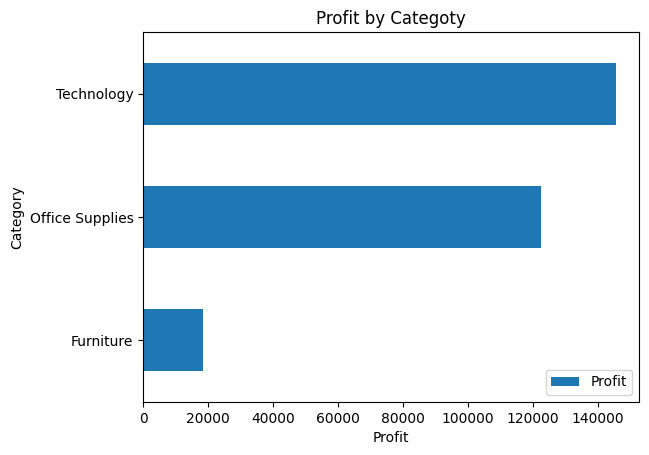

In [14]:
#Which category are the most profitable?
#Profit by category
df_cat_profit = df.copy()
df_cat_profit['Category'] = df_cat_profit['Category'].astype(str)
df_cat_profit = df_cat_profit.groupby('Category', as_index=False)['Profit'].sum()
df_cat_profit.plot(kind='barh',title='Profit by Categoty', x = 'Category', y='Profit')
plt.xlabel('Profit')


Text(0.5, 0, 'Profit')

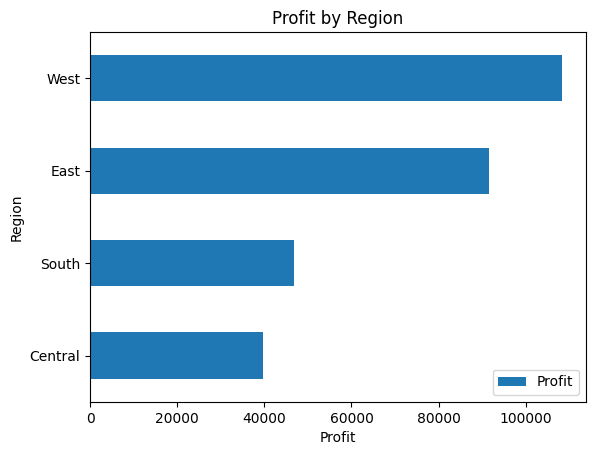

In [15]:
#Which region are performing the best/worst?
df_region_profit = df.copy()
df_region_profit['Region'] = df_region_profit['Region'].astype(str)
df_region_profit = df_region_profit.groupby('Region', as_index=False)['Profit'].sum()
df_region_profit = df_region_profit.sort_values(by='Profit', ascending=True)
df_region_profit.plot(kind='barh',title='Profit by Region', x = 'Region', y='Profit')
plt.xlabel('Profit')

Text(0, 0.5, 'Counts')

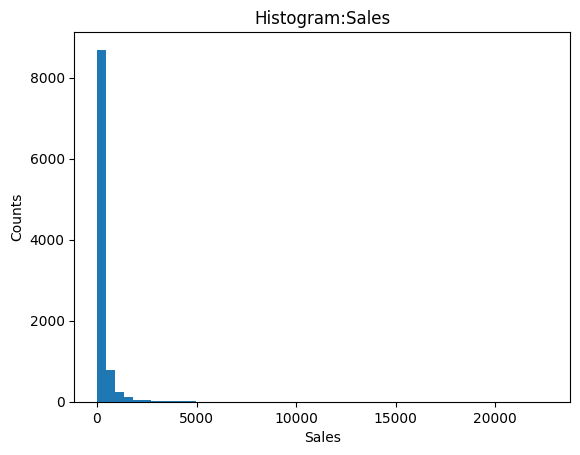

In [16]:
#Histogram graph to check the distribution of each feature.
#Sales 
Hist_Sales =df['Sales'].plot(kind='hist',bins=50, title ='Histogram:Sales')
Hist_Sales.set_xlabel('Sales')
Hist_Sales.set_ylabel('Counts')

<Axes: xlabel='Sales', ylabel='Count'>

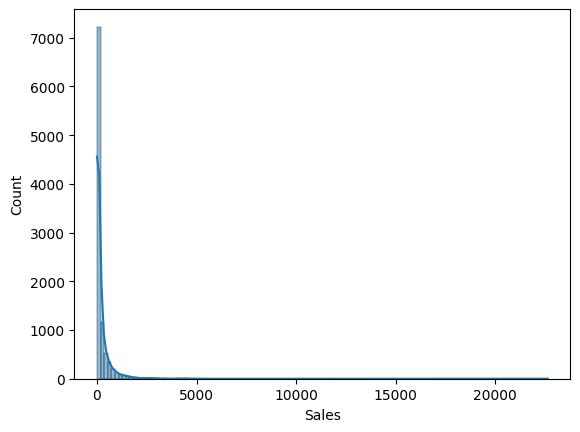

In [120]:
#Histogram graph to check the distribution of each feature.
#Sales 

sns.histplot(x='Sales', data=df,kde=True, bins=125)

<Axes: xlabel='Profit', ylabel='Count'>

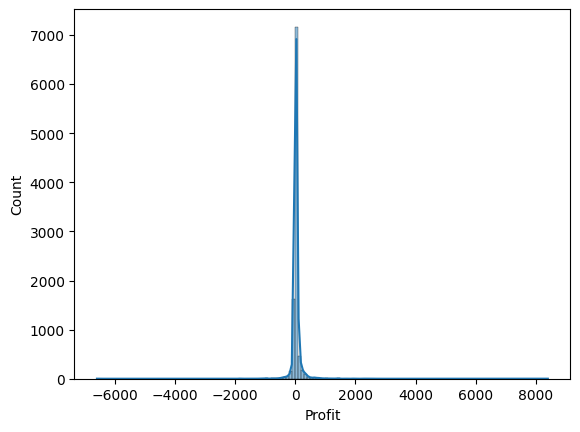

In [18]:
#Histogram graph to check the distribution of each feature.
#Profit

sns.histplot(x='Profit', data=df,kde=True,bins=150)

In [19]:
# sales by subcategory
df_subcat_sales = df.copy()

df_subcat_sales['Sub-Category'] = df_subcat_sales['Sub-Category'].astype(str)
df_subcat_sales = df_subcat_sales.groupby(['Sub-Category', 'Category'], as_index=False)['Sales'].sum()

# sort data by sales in descending order
df_subcat_sales = df_subcat_sales.sort_values(by='Sales', ascending=False)

# Column chart for overall sales by sub-category
fig_subcat_sales = px.bar(df_subcat_sales, x='Sub-Category', y='Sales', 
                 barmode='stack', color='Category', 
                 title='Sales by Sub-Category')
fig_subcat_sales.update_layout(showlegend=True)

fig_subcat_sales.show()

In [20]:
# sales by subcategory
df_subcat_sales = df.copy()

df_subcat_sales['Sub-Category'] = df_subcat_sales['Sub-Category'].astype(str)
df_subcat_sales = df_subcat_sales.groupby(['Sub-Category', 'Category'], as_index=False)['Profit'].sum()

# sort data by sales in descending order
df_subcat_sales = df_subcat_sales.sort_values(by='Profit', ascending=False)

# Column chart for overall sales by sub-category
fig_subcat_sales = px.bar(df_subcat_sales, x='Sub-Category', y='Profit', 
                 barmode='stack', color='Category', 
                 title='Sales by Sub-Category')
fig_subcat_sales.update_layout(showlegend=True)

fig_subcat_sales.show()

Text(0.5, 0, 'Average Profit Margin (%)')

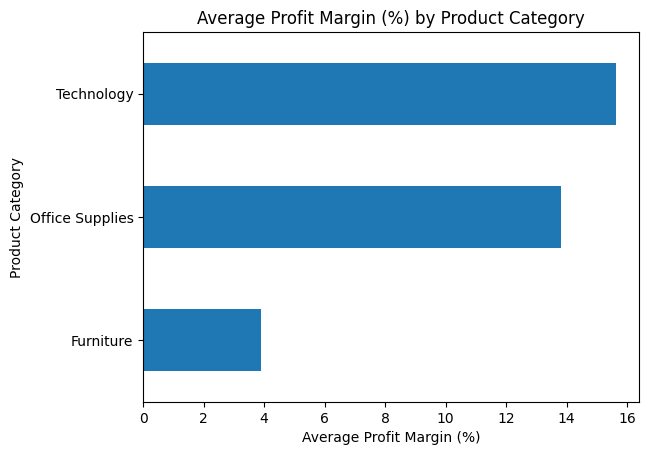

In [42]:
#create a nuw column (Profit Margin by percentage)
df["Profit Margin (%)"] = df['Profit']*100/df['Sales']
#Check the average profit margin for each category 
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin (%)'].mean()
#Display profit margin by category
avg_profit_margin_by_category.plot(kind='barh')
# Graph title, x axis and y axis labelling
plt.title("Average Profit Margin (%) by Product Category")
plt.ylabel("Product Category")
plt.xlabel("Average Profit Margin (%)")

In [36]:
avg_profit_margin_by_category = df.groupby('Category')['Profit Margin (%)'].mean()

print(avg_profit_margin_by_category)

Category
Furniture           3.882204
Office Supplies    13.803029
Technology         15.613805
Name: Profit Margin (%), dtype: float64


In [60]:
# profit margin by subcategory
df_subcat_profit_margin = df.copy()

df_subcat_profit_margin['Sub-Category'] = df_subcat_profit_margin['Sub-Category'].astype(str)
df_subcat_profit_margin = df_subcat_profit_margin.groupby(['Sub-Category', 'Category'], as_index=False)['Profit Margin (%)'].mean()

# sort data by sales in descending order
df_subcat_profit_margin = df_subcat_profit_margin.sort_values(by='Profit Margin (%)', ascending=False)

# Column chart for overall sales by sub-category
fig_subcat_profit_margin = px.bar(df_subcat_profit_margin, x='Sub-Category', y='Profit Margin (%)', 
                 barmode='stack', color='Category', 
                 title='Profit Margin (%) by Sub-Category')
fig_subcat_profit_margin.update_layout(showlegend=True)

fig_subcat_profit_margin.show()

In [117]:
#Profit Margin by customer segment
profit_margin_by_category = df.groupby('Segment')['Profit Margin (%)'].sum().reset_index()

fig_profit_margin_by_category= px.pie(profit_margin_by_category, 
             values='Profit Margin (%)', 
             names='Segment', 
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig_profit_margin_by_category.update_traces(textposition='inside', textinfo='percent+label')
fig_profit_margin_by_category.update_layout(title_text='Profit Margin (%) by Customer Segment', title_font=dict(size=30))

fig_profit_margin_by_category.show()

In [118]:
#Are there any specific customer segments that we should focus on?
sales_profit_profit_margin_by_segment = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum' , 'Profit Margin (%)' : 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig_sales_profit_profit_margin_by_segment = go.Figure()
fig_sales_profit_profit_margin_by_segment.add_trace(go.Bar(x=sales_profit_profit_margin_by_segment['Segment'], 
                     y=sales_profit_profit_margin_by_segment['Sales'], 
                     name='Sales',
                     marker_color=color_palette[7]))
fig_sales_profit_profit_margin_by_segment.add_trace(go.Bar(x=sales_profit_profit_margin_by_segment['Segment'], 
                     y=sales_profit_profit_margin_by_segment['Profit'], 
                     name='Profit',
                     marker_color=color_palette[8]))

fig_sales_profit_profit_margin_by_segment.add_trace(go.Bar(x=sales_profit_profit_margin_by_segment['Segment'], 
                     y=sales_profit_profit_margin_by_segment['Profit Margin (%)'], 
                     name='Profit Margin (%)',
                     marker_color=color_palette[9]))

fig_sales_profit_profit_margin_by_segment.update_layout(title='Sales, Profit and Profit Margin(%) Analysis by Customer Segment',title_font=dict(size=30),
                  xaxis_title='Customer Segment', yaxis_title='Value')


fig_sales_profit_profit_margin_by_segment